## Minist Data Set

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras 
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import np_utils
import tensorflow as tf
from keras.layers.core import Dense, Dropout, Activation
from tensorflow.keras import Sequential, layers, losses, optimizers, datasets


c:\Users\Chuxu\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
nb_classes = 10
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() #加载MNIST数据集
print(x_train.shape)  #打印训练集的图片
print(y_train.shape)  #打印训练集的标签
print(x_test.shape)   #打印测试数据集的图片
print(y_test.shape)   #打印测试集的标签
#输入网络的训练集测试集以及相应的标签
x_train, x_test = x_train / 255.0, x_test / 255.0

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [43]:
np.array(y_test)

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

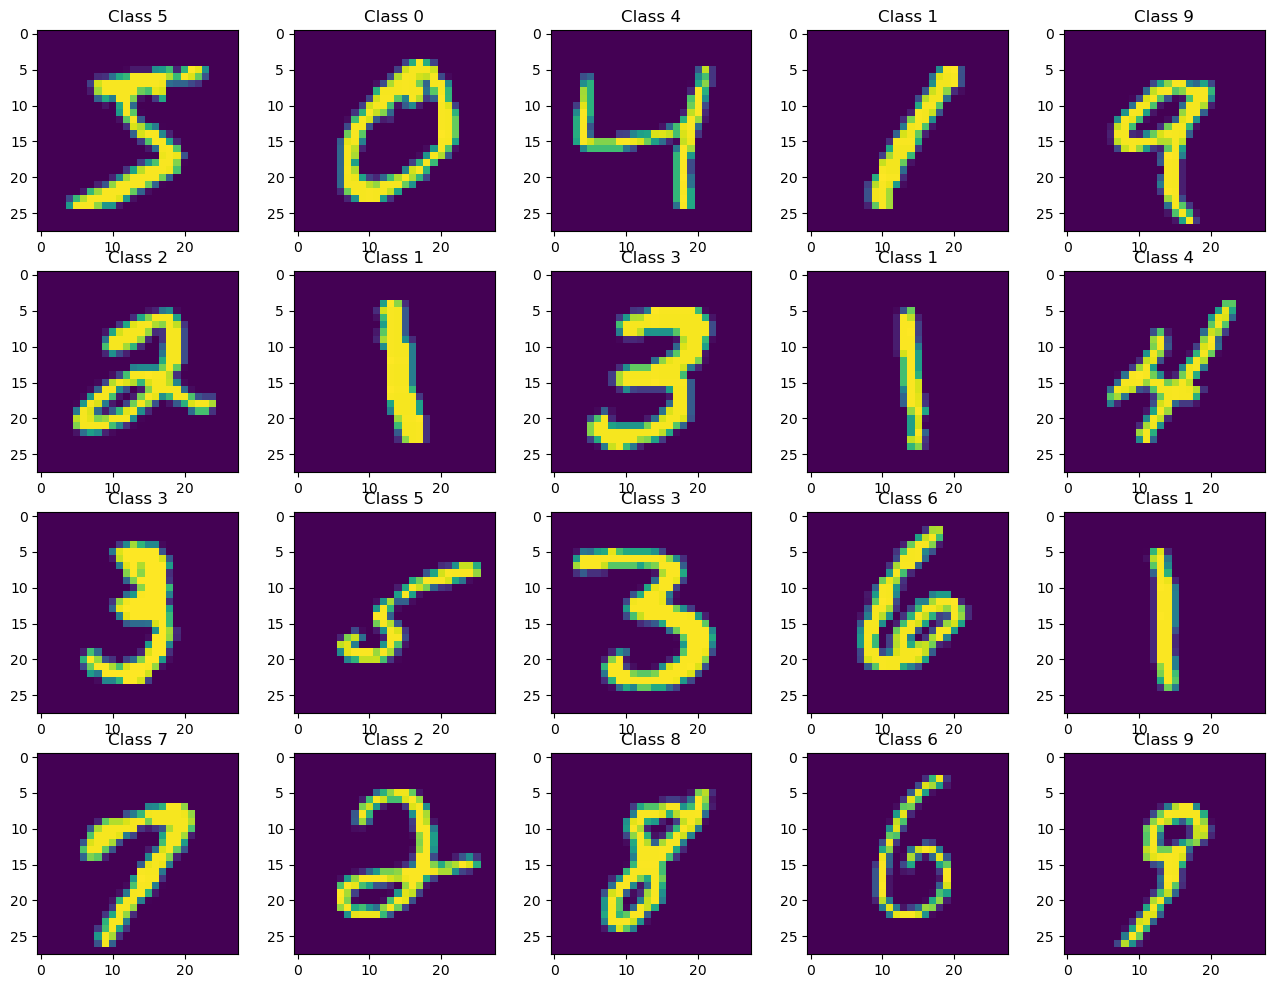

In [15]:
plt.figure(figsize=(16, 12))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(x_train[i], cmap='viridis', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [17]:
model.compile(optimizer='adam', #选择adam优化器
              loss='sparse_categorical_crossentropy',#选择sparse_categorical_crossentrop损失函数
              metrics=['accuracy']) #选择sparse_categorical_accuracy评测指标

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test), validation_freq=1)

Epoch 1/5
938/938 [==============================] - 2s 2ms/step - loss: 0.3162 - accuracy: 0.9064 - val_loss: 0.1305 - val_accuracy: 0.9592
Epoch 2/5
938/938 [==============================] - 1s 2ms/step - loss: 0.1377 - accuracy: 0.9592 - val_loss: 0.1032 - val_accuracy: 0.9670
Epoch 3/5
938/938 [==============================] - 1s 2ms/step - loss: 0.0985 - accuracy: 0.9703 - val_loss: 0.0872 - val_accuracy: 0.9740
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0776 - accuracy: 0.9763 - val_loss: 0.0788 - val_accuracy: 0.9734
Epoch 5/5
938/938 [==============================] - 1s 2ms/step - loss: 0.0629 - accuracy: 0.9809 - val_loss: 0.0717 - val_accuracy: 0.9767


In [20]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 846us/step - loss: 0.0717 - accuracy: 0.9767


[0.07170173525810242, 0.9767000079154968]

In [21]:
predict_x=model.predict(x_test) 
predicted_classes=np.argmax(predict_x,axis=1)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

313/313 [==============================] - 0s 912us/step


In [22]:
print('accuracy=',len(correct_indices)/len(y_test))

accuracy= 0.9767


### CNN

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10,3),                        
    tf.keras.layers.MaxPooling2D(pool_size=2,strides=1), 
    tf.keras.layers.ReLU(),                              
    tf.keras.layers.Conv2D(20,3),                       
    tf.keras.layers.MaxPooling2D(pool_size=2,strides=1), 
    tf.keras.layers.ReLU(),                              
    tf.keras.layers.Conv2D(10,3),                     
    tf.keras.layers.MaxPooling2D(pool_size=2,strides=1), 
    tf.keras.layers.ReLU(),                              
    tf.keras.layers.Flatten(),                          
    tf.keras.layers.Dense(120, activation='relu'),       
    tf.keras.layers.Dense(84, activation='softmax'),     
])                                
model.build(input_shape=(4, 28, 28, 1))


In [24]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (4, 26, 26, 10)           100       
                                                                 
 max_pooling2d_6 (MaxPooling  (4, 25, 25, 10)          0         
 2D)                                                             
                                                                 
 re_lu_6 (ReLU)              (4, 25, 25, 10)           0         
                                                                 
 conv2d_7 (Conv2D)           (4, 23, 23, 20)           1820      
                                                                 
 max_pooling2d_7 (MaxPooling  (4, 22, 22, 20)          0         
 2D)                                                             
                                                                 
 re_lu_7 (ReLU)              (4, 22, 22, 20)          

In [26]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
loss="sparse_categorical_crossentropy",
metrics=['acc'])

In [27]:
history = model.fit(x_train, y_train, batch_size=5, epochs=10, validation_split=0.1, verbose=1)
# 模型评估
model.evaluate(x_test, y_test)

Epoch 1/10
10800/10800 [==============================] - 43s 4ms/step - loss: 0.1817 - acc: 0.9460 - val_loss: 0.0556 - val_acc: 0.9853
Epoch 2/10
10800/10800 [==============================] - 45s 4ms/step - loss: 0.0518 - acc: 0.9836 - val_loss: 0.0501 - val_acc: 0.9853
Epoch 3/10
10800/10800 [==============================] - 47s 4ms/step - loss: 0.0352 - acc: 0.9889 - val_loss: 0.0421 - val_acc: 0.9878
Epoch 4/10
10800/10800 [==============================] - 44s 4ms/step - loss: 0.0262 - acc: 0.9915 - val_loss: 0.0555 - val_acc: 0.9847
Epoch 5/10
10800/10800 [==============================] - 45s 4ms/step - loss: 0.0206 - acc: 0.9932 - val_loss: 0.0511 - val_acc: 0.9860
Epoch 6/10
10800/10800 [==============================] - 50s 5ms/step - loss: 0.0164 - acc: 0.9949 - val_loss: 0.0355 - val_acc: 0.9905
Epoch 7/10
10800/10800 [==============================] - 49s 5ms/step - loss: 0.0140 - acc: 0.9954 - val_loss: 0.0477 - val_acc: 0.9893
Epoch 8/10
10800/10800 [=================

[0.27941155433654785, 7.9097442626953125]

In [28]:
predict_x=model.predict(x_test) 
predicted_classes=np.argmax(predict_x,axis=1)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

313/313 [==============================] - 2s 5ms/step


In [29]:
print('accuracy=',len(correct_indices)/len(y_test))

accuracy= 0.9903


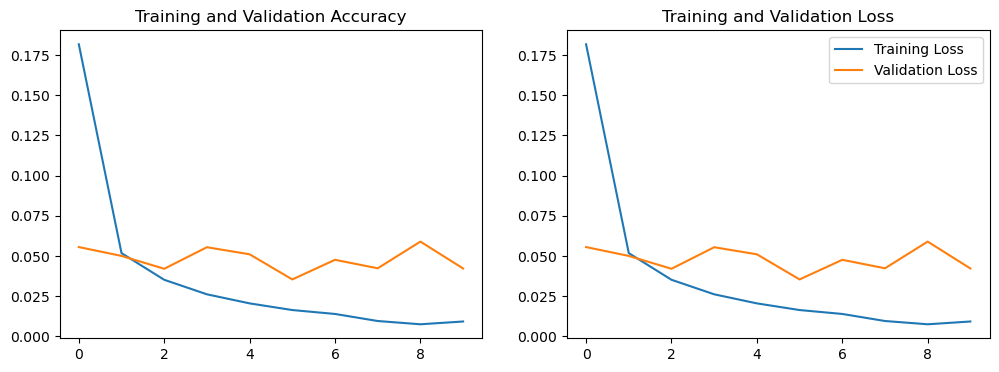

In [35]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range (10)
plt.figure(figsize=(12, 4))
plt.subplot (1, 2, 1)

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title( 'Training and Validation Accuracy')
plt.subplot (1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend (loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [49]:
from sklearn.metrics import confusion_matrix 
import seaborn as sns
import pandas as pd
# 定义一个绘制混淆矩阵图的函数
def plot_cm(labels, predictions) :
    conf_numpy = confusion_matrix(labels, predictions)
    conf_df = pd.DataFrame(conf_numpy, index=['0','1','2','3','4','5','6','7','8','9'], columns=['0','1','2','3','4','5','6','7','8','9'])
    plt.figure(figsize=(8,7))
    sns.heatmap(conf_df, annot=True, fmt="d", cma="BuPu")
    plt.title('混淆矩阵',fontsize=15)
    plt.ylabel('真实值',fontsize=14)
    plt.xlabel('预测值',fontsize=14)

In [53]:
cm=confusion_matrix(y_test,predicted_classes)

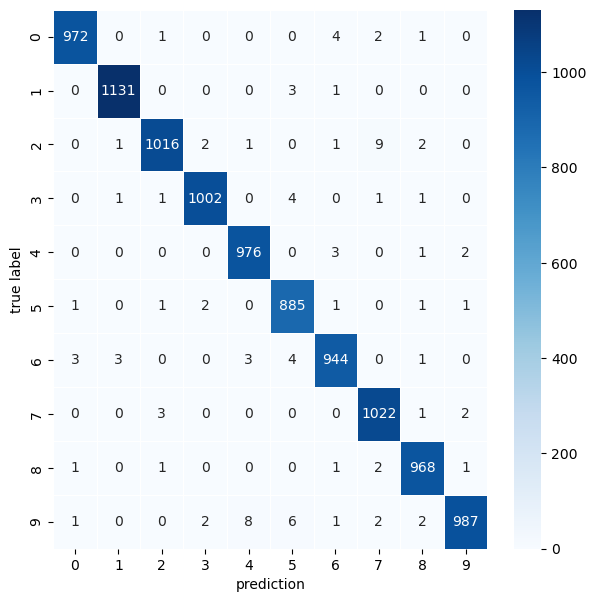

In [54]:
f, ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.5,fmt="d", cmap='Blues',ax=ax,xticklabels=['0','1','2','3','4','5','6','7','8','9'],
            yticklabels=['0','1','2','3','4','5','6','7','8','9'])
plt.xlabel("prediction")
plt.ylabel("true label")
plt.show()

## SVD

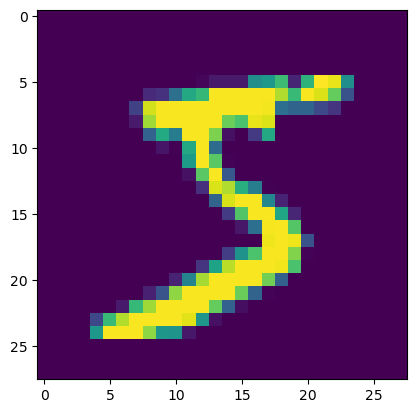

In [4]:
image=x_train[0]
plt.imshow(x_train[0], cmap='viridis', interpolation='none')

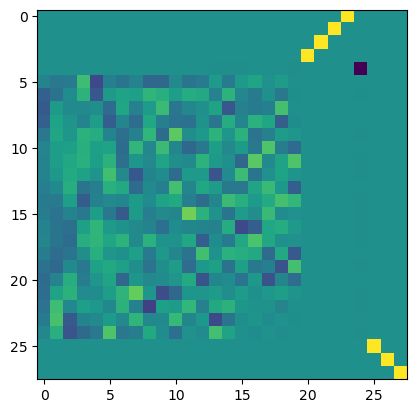

In [5]:
U, S, Vt = np.linalg.svd(image)
plt.imshow(U, cmap='viridis', interpolation='none')

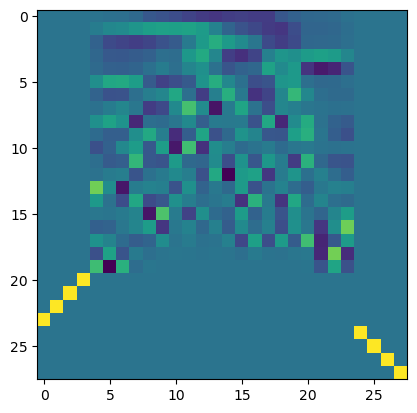

In [6]:
plt.imshow(Vt, cmap='viridis', interpolation='none')

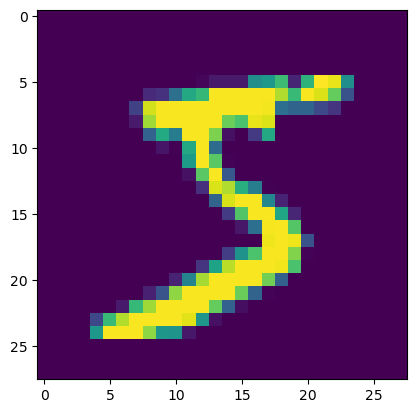

In [7]:
for k in [5,10,15,20,25]:
    compressed_image = np.dot(U[:, :k], np.dot(np.diag(S[:k]), Vt[:k, :]))
    plt.imshow(compressed_image, cmap='viridis', interpolation='none')

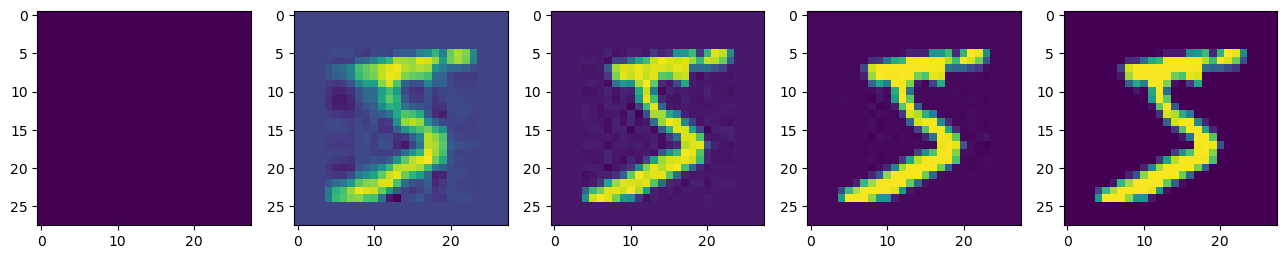

In [8]:
plt.figure(figsize=(16, 12))
i=1
for k in range(0,25,5):
    plt.subplot(1,5,i)
    compressed_image = np.dot(U[:, :k], np.dot(np.diag(S[:k]), Vt[:k, :]))
    plt.imshow(compressed_image, cmap='viridis', interpolation='none')
    i+=1